In [1]:
pip list

Package                   Version
------------------------- ------------
anyio                     4.0.0
argon2-cffi               23.1.0
argon2-cffi-bindings      21.2.0
arrow                     1.2.3
asttokens                 2.4.0
async-lru                 2.0.4
attrs                     23.1.0
Babel                     2.12.1
backcall                  0.2.0
beautifulsoup4            4.12.2
bleach                    6.0.0
certifi                   2023.7.22
cffi                      1.15.1
charset-normalizer        3.2.0
colorama                  0.4.6
comm                      0.1.4
contourpy                 1.1.1
cycler                    0.12.0
debugpy                   1.8.0
decorator                 5.1.1
defusedxml                0.7.1
exceptiongroup            1.1.3
executing                 1.2.0
fastjsonschema            2.18.0
fonttools                 4.43.0
fqdn                      1.5.1
idna                      3.4
ipykernel                 6.25.2
ipython            

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge, LogisticRegression
from sklearn.metrics import mean_squared_error, accuracy_score, mutual_info_score
from sklearn.feature_extraction import DictVectorizer
from sklearn.model_selection import train_test_split

In [3]:
data_columns = ["Make", "Model", "Year", "Engine HP", "Engine Cylinders", "Transmission Type", "Vehicle Style",
                "highway MPG", "city mpg", "MSRP"]
cars_info = pd.read_csv(r'C:\Users\Виталий\PycharmProjects\home_work_1\data.csv', usecols=data_columns)
cars_info.head()

,Make,Model,Year,Engine HP,Engine Cylinders,Transmission Type,Vehicle Style,highway MPG,city mpg,MSRP
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,18,34500


In [4]:
cars_info.columns = cars_info.columns.str.replace(' ', '_').str.lower()

In [5]:
cars_info.isna().sum()

make                  0
model                 0
year                  0
engine_hp            69
engine_cylinders     30
transmission_type     0
vehicle_style         0
highway_mpg           0
city_mpg              0
msrp                  0
dtype: int64

In [6]:
cars_info = cars_info.fillna(0)
cars_info.isna().sum()

make                 0
model                0
year                 0
engine_hp            0
engine_cylinders     0
transmission_type    0
vehicle_style        0
highway_mpg          0
city_mpg             0
msrp                 0
dtype: int64

In [7]:
cars_info = cars_info.rename(columns = {"msrp": "price"})
cars_info

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,18,34500
...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,46120
11910,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,56670
11911,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,50620
11912,Acura,ZDX,2013,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,50920


## Question 1

In [8]:
cars_info.describe(include=["O"])

,make,model,transmission_type,vehicle_style
count,11914,11914,11914,11914
unique,48,915,5,16
top,Chevrolet,Silverado 1500,AUTOMATIC,Sedan
freq,1123,156,8266,3048


## Question 2

### drop unumerical columns and creating the correlation matrix

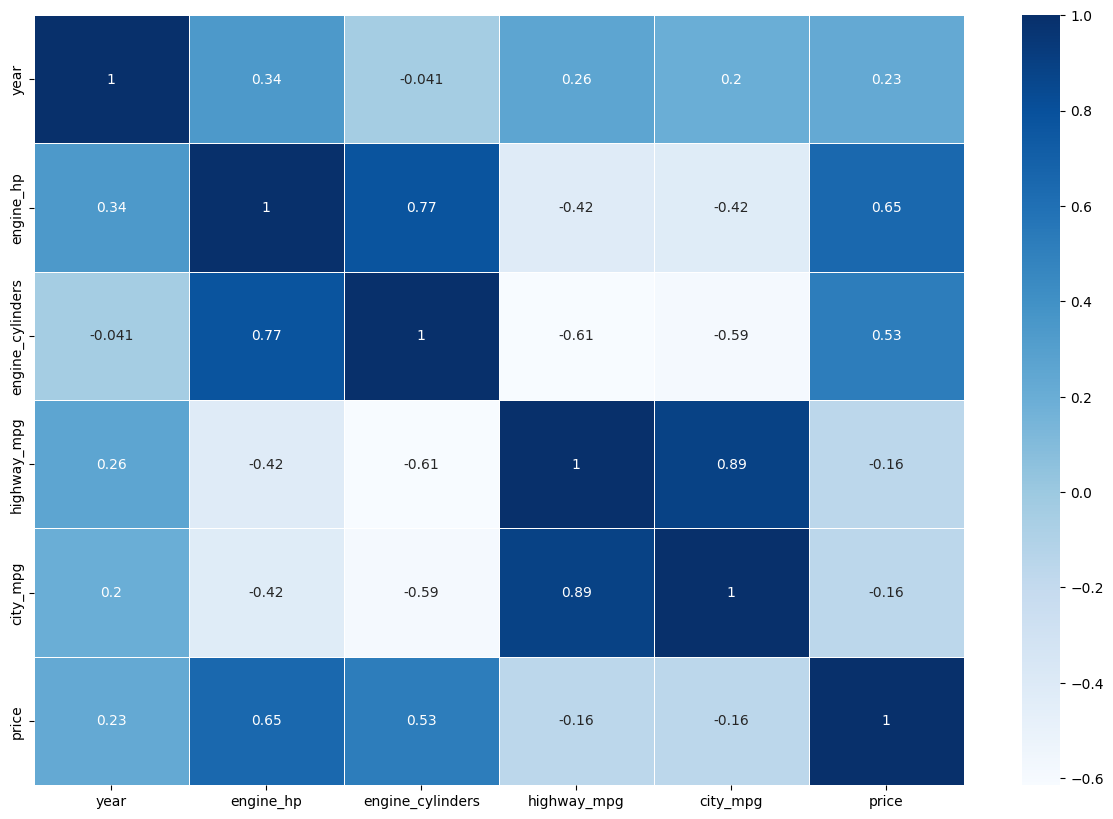

In [9]:
cars_info_copy = cars_info.copy()
cars_info_copy = cars_info_copy.drop(["transmission_type", "vehicle_style", "make", "model"], axis=1)
plt.figure(figsize=(15,10))  
sns.heatmap(cars_info_copy.corr(),annot=True,linewidths=.5, cmap="Blues")
plt.show()

In [10]:
cars_info_copy.describe()

,year,engine_hp,engine_cylinders,highway_mpg,city_mpg,price
count,11914.000000,11914.000000,11914.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,247.941749,5.614655,26.637485,19.733255,4.059474e+04
std,7.579740,110.507669,1.800554,8.863001,8.987798,6.010910e+04
min,1990.000000,0.000000,0.000000,12.000000,7.000000,2.000000e+03
25%,2007.000000,170.000000,4.000000,22.000000,16.000000,2.100000e+04
50%,2015.000000,225.000000,6.000000,26.000000,18.000000,2.999500e+04
75%,2016.000000,300.000000,6.000000,30.000000,22.000000,4.223125e+04
max,2017.000000,1001.000000,16.000000,354.000000,137.000000,2.065902e+06


## Make price binary

In [11]:
cars_info_copy = cars_info.copy()
mean = cars_info_copy['price'].mean()
cars_info_copy['above_average'] = np.where(cars_info_copy['price']>=mean,1,0)

In [12]:
cars_info_copy = cars_info_copy.drop('price', axis=1)

In [13]:
cars_info_copy.head()

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,above_average
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,1
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,1
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20,0
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,18,0
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,18,0


## Split dataset

In [14]:
train_val_ds, test_ds = train_test_split(cars_info_copy, test_size=0.2, random_state=42)
train_ds, val_ds = train_test_split(train_val_ds, test_size=0.25, random_state=42)

train_ds = train_ds.reset_index(drop=True)
val_ds = val_ds.reset_index(drop=True)
test_ds = test_ds.reset_index(drop=True)

y_train = train_ds.above_average.values
y_val = val_ds.above_average.values
y_test = test_ds.above_average.values

## Question 3

In [15]:
categorical_columns = list(cars_info_copy.dtypes[cars_info_copy.dtypes == 'object'].index)
categorical_columns

['make', 'model', 'transmission_type', 'vehicle_style']

In [16]:
def mutual_info_churn_score(series):
    return round(mutual_info_score(series, train_val_ds.above_average), 2)

mi = train_val_ds[categorical_columns].apply(mutual_info_churn_score)
mi.sort_values(ascending=True)

transmission_type    0.02
vehicle_style        0.08
make                 0.24
model                0.46
dtype: float64

## Question 4

### One-hot encording

In [21]:
numerical_columns = list(cars_info_copy.dtypes[cars_info_copy.dtypes != 'object'].index)
numerical_columns

['year',
 'engine_hp',
 'engine_cylinders',
 'highway_mpg',
 'city_mpg',
 'above_average']

In [22]:
dv = DictVectorizer(sparse=False)

train_dict = train_ds[categorical_columns + numerical_columns[:-1]].to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

val_dict = val_ds[categorical_columns + numerical_columns[:-1]].to_dict(orient='records')
X_val = dv.transform(val_dict)

### Training model

In [23]:
model = LogisticRegression(solver='liblinear', C=10, max_iter=1000, random_state=42)
model.fit(X_train, y_train)

val_dict = val_ds[categorical_columns + numerical_columns].to_dict(orient='records')
X_val = dv.transform(val_dict)
y_pred = model.predict(X_val)

accuracy = np.round(accuracy_score(y_val, y_pred),2)
print(accuracy)

0.95


## Question 5

In [24]:
features = categorical_columns + numerical_columns[:-1]
features

['make',
 'model',
 'transmission_type',
 'vehicle_style',
 'year',
 'engine_hp',
 'engine_cylinders',
 'highway_mpg',
 'city_mpg']

In [29]:
for feature in features:
    sub_features = features.copy()
    sub_features.remove(feature)

    train_dict = train_ds[sub_features].to_dict(orient='records')
    dv = DictVectorizer(sparse=False)
    dv.fit(train_dict)

    X_train = dv.transform(train_dict)

    model = LogisticRegression(solver='liblinear', C=10, max_iter=1000, random_state=42)
    model.fit(X_train, y_train)

    val_dict = val_ds[sub_features].to_dict(orient='records')
    X_val = dv.transform(val_dict)
    y_pred = model.predict(X_val)

    accuracy_without_feature = accuracy_score(y_val, y_pred)
    print(feature, abs(accuracy - accuracy_without_feature))

make 0.0032941670163658676
model 0.025954678976080503
transmission_type 0.004972723457826178
vehicle_style 0.01756189676877884
year 0.0020352496852705793
engine_hp 0.02217792698279475
engine_cylinders 0.004133445237096023
highway_mpg 0.0032941670163658676
city_mpg 0.01756189676877884


## Question 6

### prepare data

In [33]:
cars_info_copy = cars_info.copy()
cars_info['price']=np.log1p(cars_info['price'])

train_val_ds, test_ds = train_test_split(cars_info_copy, test_size=0.2, random_state=42)
train_ds, val_ds = train_test_split(train_val_ds, test_size=0.25, random_state=42)

train_ds = train_ds.reset_index(drop=True)
val_ds = val_ds.reset_index(drop=True)
test_ds = test_ds.reset_index(drop=True)

y_train = train_ds.price.values
y_val = val_ds.price.values
y_test = test_ds.price.values

del train_ds['price']
del val_ds['price']
del test_ds['price']

In [34]:
train_dict = train_ds[features].to_dict(orient='records')
dv = DictVectorizer(sparse=False)
dv.fit(train_dict)

X_train = dv.transform(train_dict)

val_dict = val_ds[features].to_dict(orient='records')
X_val = dv.transform(val_dict)

### training models with different alpha

In [36]:
alpha_list = [0, 0.01, 0.1, 1, 10]
for alpha in alpha_list:
    model = Ridge(alpha=alpha, solver="sag", random_state=42)
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_val)
    
    accurancy = np.sqrt(mean_squared_error(y_val, y_pred))
    
    print(alpha, round(accurancy, 5))

C:\Users\Виталий\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


0 0.01425


C:\Users\Виталий\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


0.01 0.01425


C:\Users\Виталий\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


0.1 0.01425


C:\Users\Виталий\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


1 0.01425
10 0.01426


C:\Users\Виталий\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
